# How to schedule a SageMaker Notebook
Some description here...
***

## Preparation

In [2]:
#---------- Packages ----------#
import pandas as pd
import matplotlib.pyplot as plt

import boto3
#---------- Default Parameters ----------#
bucket = 'rtkilian-writing'
image_name = 'covid_cumulative_aus_state.png'

## Data processing
This data set is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.This data set is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

Attribute the data as the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.Attribute the data as the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/10/22,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183265,183268,183272,183285,183358,183407,183445,183572,183687,183908
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,287984,288176,289391,290954,290954,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266257,266274,266303,266328,266356,266392,266424,266445,266487,266542
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,44671,44671,44671,45061,45061
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101320,101320,101320,101600,101901,101901,101901,102209,102209


We are only going to use the values for Australia. Australia is separated by state so I'll take the sum of the values. I'll remove the columns I no longer need.

In [4]:
df_aus = df.loc[df['Country/Region']=='Australia'] # filter for Australia
df_aus = df_aus.drop(['Country/Region', 'Lat', 'Long'], axis=1) # remove columns
df_aus = df_aus.transpose() # Transpose
df_aus = df_aus.rename(columns=df_aus.iloc[0]).drop(df_aus.index[0]) # Put the top row as the heading
df_aus.index = pd.to_datetime(df_aus.index) # Convert the index to datetime format
df_aus = df_aus[-365:] # last 365 days of data

## Visualisation

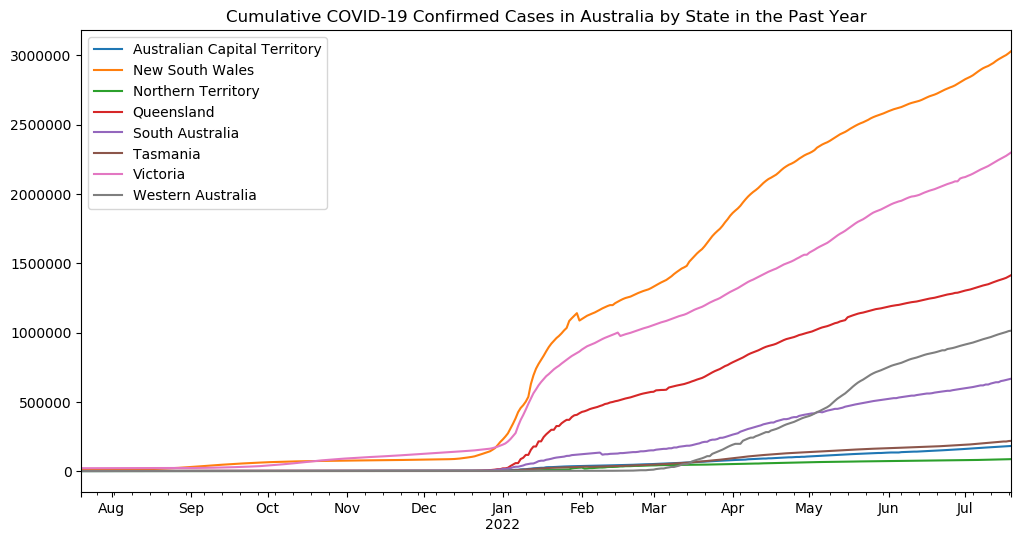

In [5]:
ax = df_aus.plot(figsize=(12,6), title='Cumulative COVID-19 Confirmed Cases in Australia by State in the Past Year')

plt.show()

## Export

Save the image locally.

In [6]:
# save the plot to local volume
fig = ax.get_figure()
fig.savefig(image_name)

We then upload to our S3 bucket.

In [7]:
# Upload to S3
key='sagemaker-schedule/'+image_name
img_data = open(image_name, 'rb')

s3 = boto3.resource('s3')
s3.Bucket(bucket).put_object(Key=key, Body=img_data, 
                                 ContentType='image/png')

s3.Object(bucket_name='rtkilian-writing', key='sagemaker-schedule/covid_cumulative_aus_state.png')